# Clustering Analysis

In [382]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [383]:
#Read data

data_losses=pd.read_csv('automobile-losses.csv',encoding='Latin1')
data_risk=pd.read_csv('automobile-risk.csv',encoding='Latin1')
data_spec=pd.read_csv('automobile-spec.csv',encoding='Latin1')

## Quick-Look Data

In [384]:
#merge data using the similar keys in data 'ID', but 'merge' is only able to merge two data 
#so we will need to take it to two stages

data1=pd.merge(data_losses, data_risk, how='outer', on='ID') #first, merge two data to be new data frame
datanew=pd.merge(data1, data_spec, how='outer', on='ID' )    #second, then the 'new data frame' merge with other data

#get the 5 first of data using .head()
datanew.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [385]:
#detection missing values each variables of data
count_missing = datanew.isnull().sum().sort_values(ascending = False)
count_missing

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
wheel-base            0
symboling             0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheel           0
engine-loc            0
height                0
length                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
compression-ratio     0
city-mpg              0
ID                    0
dtype: int64

In [386]:
#handling missing values by replacing numeric data using median and categoric data using mode
#fisrt, handling missing values in numeric data
median_value1=datanew['normalized-losses'].median()
median_value2=datanew['price'].median()
median_value3=datanew['stroke'].median()
median_value4=datanew['bore'].median()
median_value5=datanew['peak-rpm'].median()
median_value6=datanew['horsepower'].median()
datanew['normalized-losses']=datanew['normalized-losses'].fillna(median_value1)
datanew['price']=datanew['price'].fillna(median_value2)
datanew['stroke']=datanew['stroke'].fillna(median_value3)
datanew['bore']=datanew['bore'].fillna(median_value4)
datanew['peak-rpm']=datanew['peak-rpm'].fillna(median_value5)
datanew['horsepower']=datanew['horsepower'].fillna(median_value6)

In [387]:
#handling missing value in categorical variable using mode
datanew = datanew.fillna(datanew['num-of-doors'].value_counts().index[0])

In [388]:
#Detecting missing value in data after handling this
count_missing = datanew.isnull().sum().sort_values(ascending = False)
count_missing

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
height               0
highway-mpg          0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
ID                   0
dtype: int64

In [389]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    205 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-nu

In [390]:
#Dropping categorical variable 
#Because on the method used can not clustering on the categoric data
datanew=datanew.drop(['ID', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheel', 'engine-loc', 'engine-type',
                    'cylinder', 'fuel-system'], axis=1)

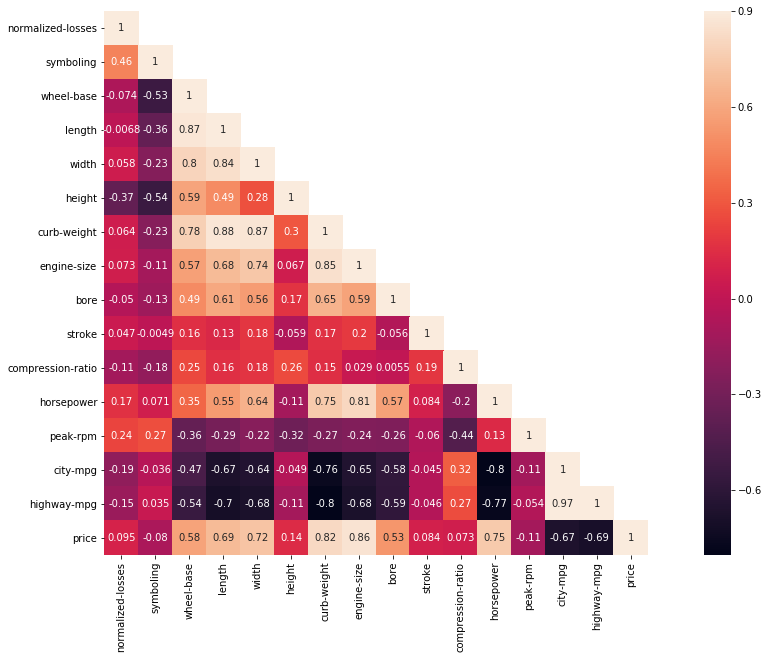

In [391]:
#create correlation with hitmap

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#create correlation
corr = datanew.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

From the heat map above, I want to know the variables that are interconnected or have a strong relationship that can later be used for further clustering analysis. Of the result, which does not have a fairly close relationship is the variable 'normalized-losses', 'symboling', 'height', 'stroke', 'compression-ratio', 'peak-rpm'. So, I'll drop that variable in the next step.

In [392]:
# Dropping variable that not have a fairly close relationship

datanew=datanew.drop(['normalized-losses', 'symboling', 'height', 'stroke', 'compression-ratio', 'peak-rpm'], axis=1)
datanew.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,17450.0


In [393]:
# Get array of data before clustering analysis
X = np.asarray(datanew)

## K-Means Clustering Analysis

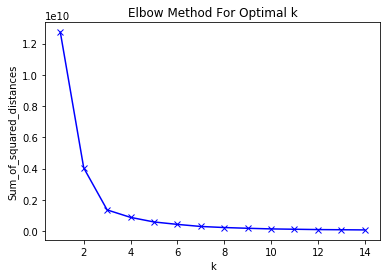

In [394]:
#Get optimal k on k-means clustering analysis using scree plot

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the scree plot above is appearing that the optimal k that can be used for analysis is k = 3. Because if selected k = 4 cluster have constant values.

In [395]:
# K-Means clustering analysis using k=3
# Fitting model K-Means clustering analysis
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [396]:
# Print K-Means cluster centroid
print(kmeans.cluster_centers_)

[[9.61531746e+01 1.67725397e+02 6.48317460e+01 2.24706349e+03
  1.06015873e+02 3.22777778e+00 8.40634921e+01 2.85000000e+01
  3.43015873e+01 8.46534127e+03]
 [1.05681250e+02 1.90537500e+02 6.92937500e+01 3.53525000e+03
  2.30000000e+02 3.63375000e+00 1.76750000e+02 1.66875000e+01
  2.10625000e+01 3.49976875e+04]
 [1.02204762e+02 1.82509524e+02 6.72000000e+01 2.92376190e+03
  1.42507937e+02 3.45523810e+00 1.25936508e+02 2.08253968e+01
  2.61111111e+01 1.69716984e+04]]


In [397]:
# Displaying clustering results data
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered

,0,1,2,3,4,5,6,7,8,9,cluster
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,13495.0,2
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,16500.0,2
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,16500.0,2
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,13950.0,2
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,17450.0,2
5,99.8,177.3,66.3,2507.0,136.0,3.19,110.0,19.0,25.0,15250.0,2
6,105.8,192.7,71.4,2844.0,136.0,3.19,110.0,19.0,25.0,17710.0,2
7,105.8,192.7,71.4,2954.0,136.0,3.19,110.0,19.0,25.0,18920.0,2
8,105.8,192.7,71.4,3086.0,131.0,3.13,140.0,17.0,20.0,23875.0,2
9,99.5,178.2,67.9,3053.0,131.0,3.13,160.0,16.0,22.0,10295.0,0


In [398]:
# Get infromation of number mobile by cluster
data_clustered['cluster'].value_counts()

0    126
2     63
1     16
Name: cluster, dtype: int64

From here it appears that cluster 0 : amounted to 63, cluster 1 : amounted to 16 , and cluster 2 : amounted to 126.

Text(0.5,0,'Type of Cluster')

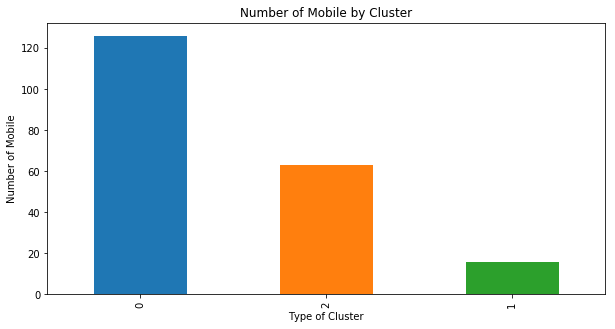

In [399]:
#Distribution of Class cluster

data_clustered['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Mobile by Cluster")
plt.ylabel('Number of Mobile')
plt.xlabel('Type of Cluster')

In [400]:
# Get information about min value each variable by cluster
datakmeans1=data_clustered.groupby([data_clustered['cluster']]).min()
datakmeans1

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,86.6,141.1,60.3,1488.0,61.0,2.91,48.0,16.0,22.0,5118.0
1,89.5,168.9,65.0,2756.0,183.0,3.46,123.0,13.0,16.0,28176.0
2,88.6,168.8,64.1,2337.0,70.0,2.54,68.0,16.0,20.0,12764.0


In [401]:
# Get information about max value each variable by cluster
datakmeans2=data_clustered.groupby([data_clustered['cluster']]).max()
datakmeans2

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,114.2,198.9,72.3,3366.0,203.0,3.94,288.0,49.0,54.0,12629.0
1,120.9,208.1,72.0,4066.0,326.0,3.80,262.0,22.0,25.0,45400.0
2,114.2,198.9,71.4,3515.0,183.0,3.94,200.0,33.0,39.0,25552.0


Dari infromasi diatas terlihat bahwa setiap cluster memiliki karakteristik masing- masing. Dari infromasi tersebut terlihat dari segi harga, cluster 0 memiliki nilai price paling rendah, kemudian cluster 1 memiliki nilai price paling tinggi, dan cluster 1 memiliki nilai price sedang.
Ket : Column : Price (9)

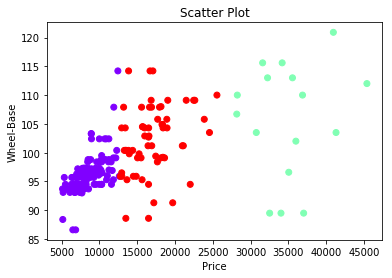

In [422]:
plt.scatter(X[:,9],X[:,0], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Price")
plt.ylabel("Wheel-Base")
plt.title("Scatter Plot")
plt.show()

## Hierarchial Clustering

In [402]:
# Import libraries
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

To get a value of k, in hierarchial clustering is used Dendogram to determine how many clusters will be formed
In this step, using method = 'ward' cause The Ward method is based on the criterion of Sum square error (SSE) with the size of homogenization between two objects based on the sum of the minimum error squared.

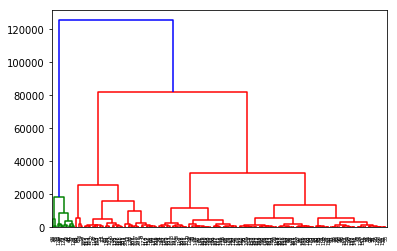

In [403]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

From dendogram above, i choose using k= 5 to hierarchial analysis

In [404]:
# fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([3, 1, 1, 3, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 4, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2,
       3, 3, 3, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 1,
       1, 4, 4, 4, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 1, 1, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 0, 0, 0, 3, 2, 3,
       3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 3, 3,
       3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [405]:
# Displaying clustering results data
dataclustered = pd.DataFrame(X)
dataclustered['cluster'] = pd.DataFrame(labels)
dataclustered

,0,1,2,3,4,5,6,7,8,9,cluster
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,13495.0,3
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,16500.0,1
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,16500.0,1
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,13950.0,3
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,17450.0,1
5,99.8,177.3,66.3,2507.0,136.0,3.19,110.0,19.0,25.0,15250.0,1
6,105.8,192.7,71.4,2844.0,136.0,3.19,110.0,19.0,25.0,17710.0,1
7,105.8,192.7,71.4,2954.0,136.0,3.19,110.0,19.0,25.0,18920.0,1
8,105.8,192.7,71.4,3086.0,131.0,3.13,140.0,17.0,20.0,23875.0,4
9,99.5,178.2,67.9,3053.0,131.0,3.13,160.0,16.0,22.0,10295.0,3


In [406]:
# Get infromation of number mobile by cluster
dataclustered['cluster'].value_counts()

2    91
3    49
1    46
0    14
4     5
Name: cluster, dtype: int64

From here it appears that cluster 0 : amounted to 14, cluster 1 : amounted to 49 , cluster 2 : amounted to 91, cluster 3 : amounted to 49, and cluster 4 : amounted to 5.

Text(0.5,0,'Type of Cluster')

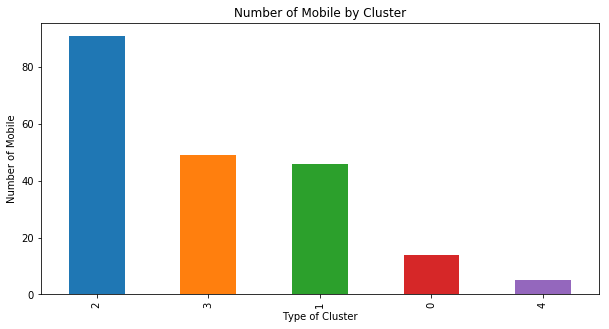

In [407]:
#Distribution of Class cluster

dataclustered['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Mobile by Cluster")
plt.ylabel('Number of Mobile')
plt.xlabel('Type of Cluster')

Get infromation about class cluster

In [408]:
# Get information about min value each variable by cluster
datahierarki1=dataclustered.groupby([dataclustered['cluster']]).min()
datahierarki1

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,89.5,168.9,65.0,2756.0,183.0,3.46,123.0,13.0,16.0,30760.0
1,88.6,168.8,64.1,2395.0,80.0,2.54,72.0,16.0,22.0,14399.0
2,86.6,141.1,60.3,1488.0,61.0,2.91,48.0,23.0,25.0,5118.0
3,88.6,155.9,62.5,1874.0,70.0,3.01,64.0,16.0,22.0,9895.0
4,103.5,187.5,66.9,3055.0,131.0,3.13,121.0,17.0,20.0,23875.0


In [409]:
# Get information about max value each variable by cluster
datahierarki2=dataclustered.groupby([dataclustered['cluster']]).max()
datahierarki2

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
0,120.9,208.1,72.0,4066.0,326.0,3.80,262.0,22.0,25.0,45400.0
1,114.2,198.9,71.4,3485.0,181.0,3.94,200.0,31.0,39.0,22625.0
2,103.3,181.5,66.5,3110.0,146.0,3.62,116.0,49.0,54.0,9639.0
3,114.2,198.9,72.3,3430.0,203.0,3.94,288.0,38.0,43.0,13950.0
4,110.0,192.7,71.4,3750.0,183.0,3.58,140.0,22.0,25.0,28248.0


Dari infromasi diatas terlihat bahwa setiap cluster memiliki karakteristik masing- masing. Dari infromasi tersebut terlihat dari segi price, cluster 2 memiliki nilai price paling rendah dan cluster 0 memiliki price paling tinggi, dan cluster 1 memiliki nilai price sedang. Ket : Column : Price (9).

# DBScan Cluster Analysis

In [410]:
# Import Libraries
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [411]:
# Melakukan fitting DBScan clustering
# eps=3500, cause any data that have not similar range values
# min_sample=8
dbscan = DBSCAN(eps=3500, min_samples=8)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=3500, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=8, n_jobs=1, p=None)

In [412]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int64)

In [413]:
# Displaying clustering results data
dataclustering = pd.DataFrame(X)
dataclustering['cluster'] = pd.DataFrame(dbscan.labels_)
dataclustering

,0,1,2,3,4,5,6,7,8,9,cluster
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,13495.0,0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,16500.0,0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,16500.0,0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,13950.0,0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,17450.0,0
5,99.8,177.3,66.3,2507.0,136.0,3.19,110.0,19.0,25.0,15250.0,0
6,105.8,192.7,71.4,2844.0,136.0,3.19,110.0,19.0,25.0,17710.0,0
7,105.8,192.7,71.4,2954.0,136.0,3.19,110.0,19.0,25.0,18920.0,0
8,105.8,192.7,71.4,3086.0,131.0,3.13,140.0,17.0,20.0,23875.0,0
9,99.5,178.2,67.9,3053.0,131.0,3.13,160.0,16.0,22.0,10295.0,0


In [414]:
# Get infromation of number mobile by cluster
dataclustering['cluster'].value_counts()

 0    189
 1     13
-1      3
Name: cluster, dtype: int64

From here it appears that cluster 0 : amounted to 189, cluster 1 : amounted to 13 , cluster -1 (cluster noise) : amounted to 3.

Text(0.5,0,'Type of Cluster')

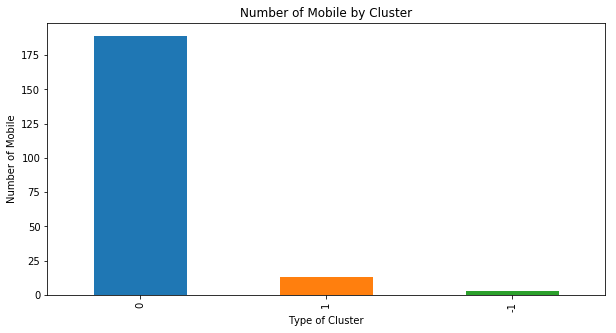

In [415]:
#Distribution of Class cluster

dataclustering['cluster'].value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("Number of Mobile by Cluster")
plt.ylabel('Number of Mobile')
plt.xlabel('Type of Cluster')

In [416]:
# Get information about min value each variable by cluster
datadbscan1=dataclustering.groupby([dataclustering['cluster']]).min()
datadbscan1

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
-1,103.5,193.8,67.9,3380.0,209.0,3.62,182.0,14.0,16.0,40960.0
0,86.6,141.1,60.3,1488.0,61.0,2.54,48.0,16.0,20.0,5118.0
1,89.5,168.9,65.0,2756.0,183.0,3.46,123.0,13.0,17.0,28176.0


In [417]:
# Get information about max value each variable by cluster
datadbscan2=dataclustering.groupby([dataclustering['cluster']]).max()
datadbscan2

,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
-1,120.9,208.1,72.0,3900.0,308.0,3.80,184.0,16.0,22.0,45400.0
0,114.2,198.9,72.3,3515.0,203.0,3.94,288.0,49.0,54.0,25552.0
1,115.6,202.6,71.7,4066.0,326.0,3.74,262.0,22.0,25.0,37028.0


Dari infromasi diatas terlihat bahwa setiap cluster memiliki karakteristik masing- masing. Dari infromasi tersebut terlihat dari segi price, cluster 0 memiliki nilai price paling rendah dan cluster 1 memiliki price sedang, dan sedangkan cluster -1 atau noise adalah mobile yang memiliki nilai harga sangat tinggi. Ket : Column : Price (9)